<a href="https://colab.research.google.com/github/gmagannaDevelop/segnet/blob/callback_test/isbi_neural_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!ls

sample_data


In [3]:
!apt install jq
!pip install git+https://github.com/gmagannaDevelop/segnet.git@callback_test

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libjq1 libonig4
The following NEW packages will be installed:
  jq libjq1 libonig4
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 276 kB of archives.
After this operation, 930 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libonig4 amd64 6.7.0-1 [119 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libjq1 amd64 1.5+dfsg-2 [111 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 jq amd64 1.5+dfsg-2 [45.6 kB]
Fetched 276 kB in 2s (132 kB/s)
Selecting previously unselected package libonig4:amd64.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../libon

In [4]:
import os
import collections

###############################################################
import tensorflow as tf
import segnet.metrics as mts
from segnet.models import unet
from segnet.models import multiresunet as mru
from segnet.models import multiresunet2 as mru2
from segnet.models import multiresunet3 as mru3
from segnet.utils.Segmed import Segmed
###############################################################

In [5]:
### Data-related
from google.colab import drive, files
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# Where can we find everything : 
root_dir = "drive/My Drive/A-SSP-New-tests"
# Where will we log everything :
log_dir  = os.path.join(root_dir, "Logs/ISBI_SDG_CPU")

In [0]:
dataset_paths = {
  "ISBI": os.path.join(root_dir, "Colab_data/ISBI_neural/structured"), 
  "dermoscopy80":  os.path.join(root_dir, "Colab_data/dermoscopy80"),  # reduced to 80 images
  "chinese1":      os.path.join(root_dir, "Colab_data/Dataset 2")      # Chinese dataset
}

In [8]:
Segmed.assert_isdir(dataset_paths["ISBI"])

'drive/My Drive/A-SSP-New-tests/Colab_data/ISBI_neural/structured'

In [0]:
optimizers = {
    "chinese": tf.keras.optimizers.SGD(learning_rate=0.06, momentum=0.2, nesterov=False),
    "chinese nesterov": tf.keras.optimizers.SGD(learning_rate=0.06, momentum=0.2, nesterov=True),
    "Original Adam": tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=10e-8),
    "Original Adamax": tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
    "Aggresive Adamax": tf.keras.optimizers.Adamax(learning_rate=0.06, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
}

my_compiling_kw = collections.OrderedDict({
  key: {
    'optimizer': optimizers[key],
    'loss': 'binary_crossentropy',
    'metrics': [
      mts.jaccard_index, mts.dice_coef,
      mts.O_Rate, mts.U_Rate, mts.Err_rate
    ]
  } for key in optimizers.keys()
})

In [28]:
dataset = dataset_paths["ISBI"]
n_masks = len(os.listdir(os.path.join(dataset, "msks/masks"))) 
n_images = len(os.listdir(os.path.join(dataset, "imgs/images"))) 
print(f" Number \n masks:\t{n_masks}\nimages:\t{n_images}")

 Number 
 masks:	31
images:	31


In [0]:
my_hyper_params = {
    'batch_size': 8,
    'epochs': 10,
    'steps_per_epoch': 4
}

In [0]:
architectures = collections.OrderedDict({
  #"MultiResUNet Edwin": mru.MultiResUnet(),
  #"MultiResUNet Gustavo": mru2.MultiResUNet(),
  #"Unet": unet(),
  "MultiResUNet Original": mru3.MultiResUnet()
})

In [0]:
#architectures.update({"MultiResUNet Edwin": mru.MultiResUnet()})

In [31]:
architectures.keys()

odict_keys(['MultiResUNet Original'])

In [0]:
models = collections.OrderedDict({
    key: Segmed(
        model = architectures["MultiResUNet Original"],
        name = f"MultiResUNet Original-{key} optimizer",
        base_dir = log_dir,
        data_path = dataset,
        author = "Gustavo Magaña"
    )
    for key in my_compiling_kw.keys()
})

Found 24 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 6 images belonging to 1 classes.
Found 6 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 6 images belonging to 1 classes.
Found 6 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 6 images belonging to 1 classes.
Found 6 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 6 images belonging to 1 classes.
Found 6 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 6 images belonging to 1 classes.
Found 6 images belonging to 1 classes.
Image/mask pairs for achitecture `chinese`


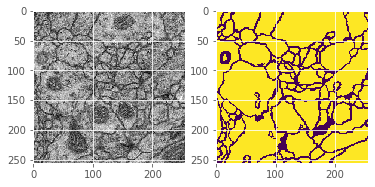

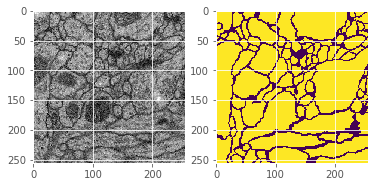

Image/mask pairs for achitecture `chinese nesterov`


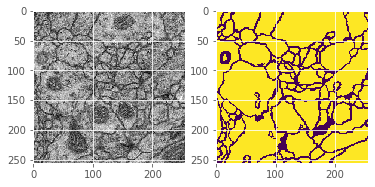

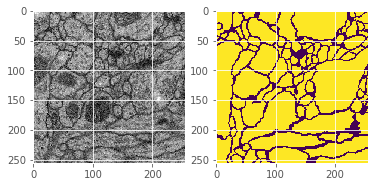

Image/mask pairs for achitecture `Original Adam`


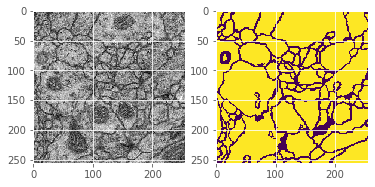

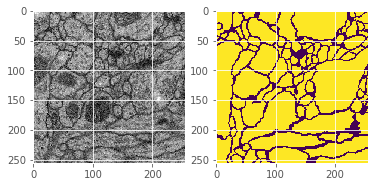

Image/mask pairs for achitecture `Original Adamax`


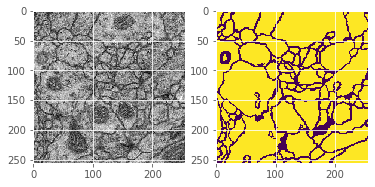

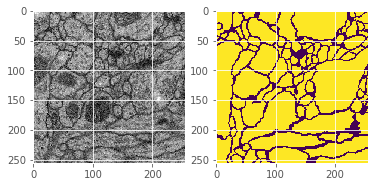

Image/mask pairs for achitecture `Aggresive Adamax`


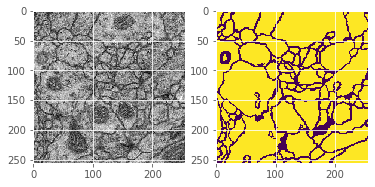

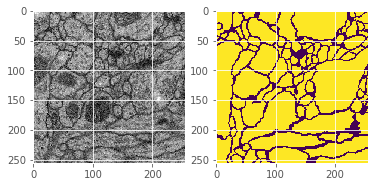

In [33]:
# Create the generators to enable visualisation :
for model in models.values():
  model.create_train_test_generators()

for model in models.keys():
  print(f"Image/mask pairs for achitecture `{model}`")
  models[model].show_img_and_mask(n=2)

In [0]:
for model in models.values():
  model.comment(" Comparing optimizers. ")

In [0]:
for key in my_compiling_kw.keys():
  models[key].train(
      compiling_kw = my_compiling_kw[key],
      hyper_params = my_hyper_params
  )


Compiling model with params: {'optimizer': <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fbc28080160>, 'loss': 'binary_crossentropy', 'metrics': [<function jaccard_index at 0x7fbc3820c1e0>, <function dice_coef at 0x7fbc3820c2f0>, <function O_Rate at 0x7fbc3820c048>, <function U_Rate at 0x7fbc3820c0d0>, <function Err_rate at 0x7fbc3820c158>]}


Creating custom callback with params: {'monitor': 'val_jaccard_index', 'verbose': 1, 'save_best_only': True, 'mode': 'max'}


Creating train and test generators with params:
for data gen:{'rescale': 0.00392156862745098, 'validation_split': 0.2, 'dtype': tf.float32}
hyper_params:{'batch_size': 8, 'epochs': 10, 'steps_per_epoch': 4}

Found 24 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 6 images belonging to 1 classes.
Found 6 images belonging to 1 classes.

Training `MultiResUNet Original-chinese optimizer` on dataset : `drive/My Drive/A-SSP-New-tests/Colab_data/ISBI_neural/structured`


S

In [0]:
models.keys()

odict_keys(['MultiResUNet Gustavo', 'Unet', 'MultiResUNet Original'])

In [0]:
models["MultiResUNet Gustavo"]["history"].history